In [57]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import euclidean

In [58]:
# Creating a DataFrame from a CSV file
transport = pd.read_csv('dataset.csv')

#Take a quick look at the data such as using head, describe, info
print(transport.head())
print(transport.info())
print(transport.describe())

                              ID  travel_fee             departure_time  \
0  2013-07-02 19:54:00.000000232         7.0  2013-07-02 19:54:00+00:00   
1    2013-09-28 00:21:31.0000002         5.5  2013-09-28 00:21:31+00:00   
2  2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00   
3  2013-07-20 13:43:00.000000121         9.5  2013-07-20 13:43:00+00:00   
4    2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00   

   departure_long  departure_lat  arrival_long  arrival_lat  occupancy  
0      -74.005360      40.728867    -74.008913    40.710907          1  
1      -74.014165      40.708941    -74.016310    40.716734          1  
2      -73.991075      40.760352    -73.941382    40.713292          1  
3      -74.002662      40.723630    -73.991722    40.748905          5  
4      -73.962397      40.712705    -73.996834    40.680403          2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416725 entries, 0 to 416724
Data columns (total 8 columns):
 

In [59]:
# Exploring categorical variables
categorical_columns = ['ID','departure_time']
for column in categorical_columns:
    print("\nUnique values in", column)
    print(transport[column].unique())
    print("Value counts:")
    print(transport[column].value_counts())

# Analyzing numerical variables
numerical_columns = ['travel_fee','departure_long',"departure_lat",'arrival_long','arrival_lat', 'occupancy']

for column in numerical_columns:
    print("\nStatistics for", column)
    print("Minimum:", transport[column].min())
    print("Maximum:", transport[column].max())
    print("Mean:", transport[column].mean())
    print("Standard deviation:", transport[column].std())


Unique values in ID
['2013-07-02 19:54:00.000000232' '2013-09-28 00:21:31.0000002'
 '2013-06-16 03:18:00.000000150' ... '2013-12-28 22:00:00.00000097'
 '2013-07-02 11:43:27.0000002' '2013-11-29 17:38:00.00000080']
Value counts:
2013-07-02 19:54:00.000000232    1
2013-01-21 11:43:47.0000003      1
2013-07-13 11:56:00.00000086     1
2013-05-25 00:36:00.00000086     1
2013-10-08 08:53:42.0000004      1
                                ..
2013-10-31 21:58:48.0000003      1
2013-06-07 16:24:12.0000003      1
2013-11-26 06:37:33.0000001      1
2013-03-04 12:29:28.0000001      1
2013-11-29 17:38:00.00000080     1
Name: ID, Length: 416725, dtype: int64

Unique values in departure_time
['2013-07-02 19:54:00+00:00' '2013-09-28 00:21:31+00:00'
 '2013-06-16 03:18:00+00:00' ... '2013-05-03 16:50:58+00:00'
 '2013-07-02 11:43:27+00:00' '2013-11-29 17:38:00+00:00']
Value counts:
2013-11-03 01:36:00+00:00    9
2013-05-20 22:00:00+00:00    8
2013-02-28 21:51:00+00:00    8
2013-04-05 22:36:00+00:00    8


### Visualization

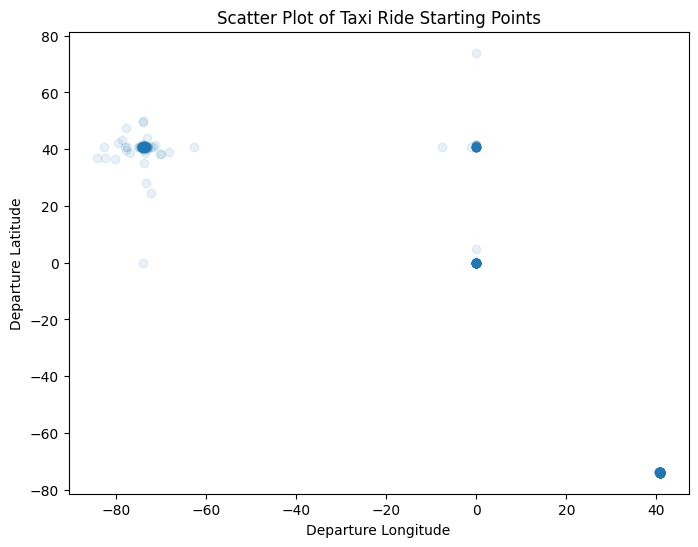

In [60]:
#Diagram 1 Departure longtitude and longtitude
plt.figure(figsize=(8, 6))
plt.scatter(transport['departure_long'], transport['departure_lat'] , alpha=0.1)
plt.xlabel('Departure Longitude')
plt.ylabel('Departure Latitude')
plt.title('Scatter Plot of Taxi Ride Starting Points')
plt.show()

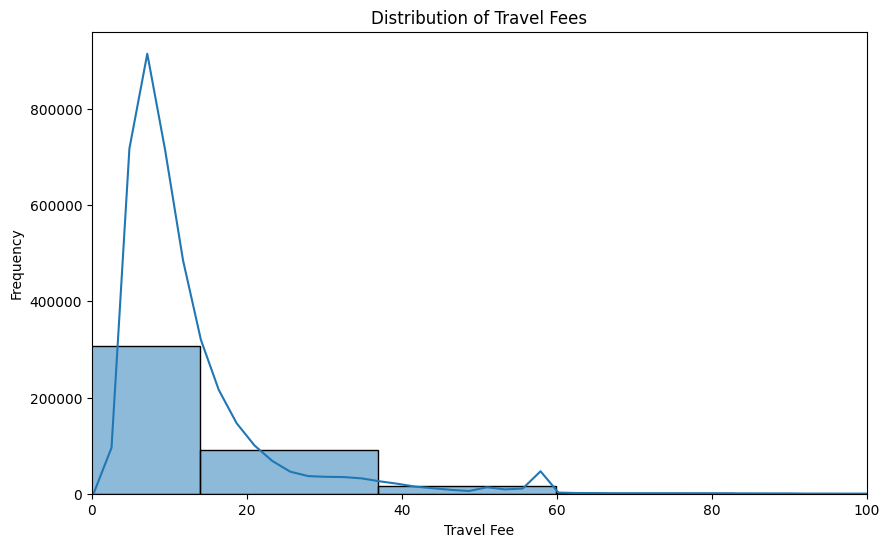

In [61]:
# Diagram 2 Distribution of travel fees
plt.figure(figsize=(10, 6))
sns.histplot(data=transport, x='travel_fee', bins=20, kde=True)
plt.title('Distribution of Travel Fees')
plt.xlabel('Travel Fee')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

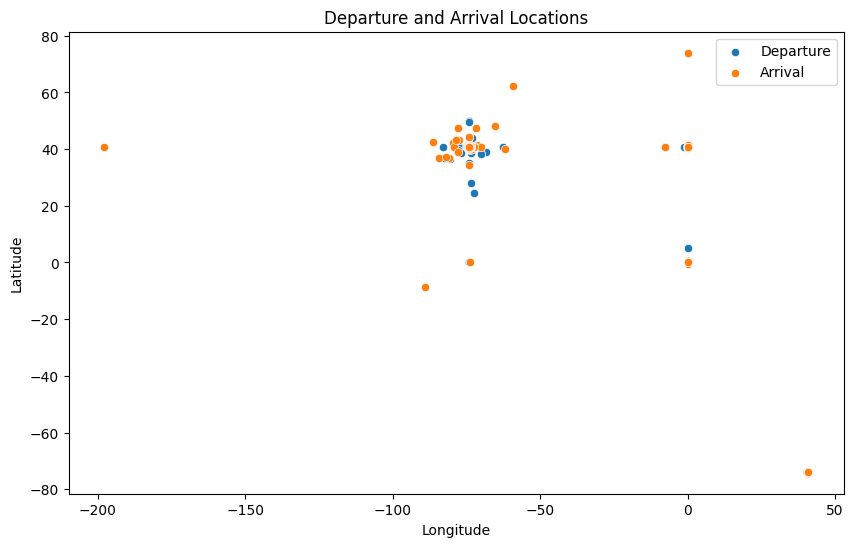

In [62]:
#Diagram 3 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transport, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=transport, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

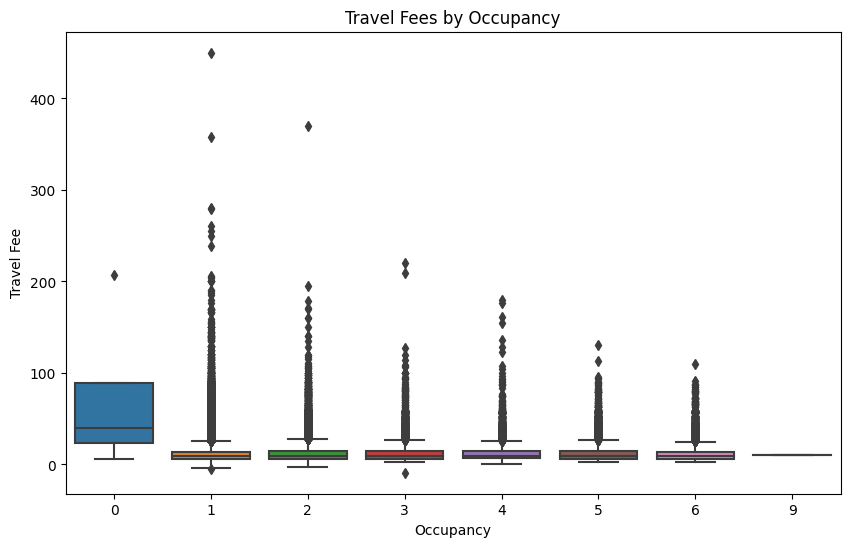

In [63]:
# Diagram 4 Boxplot of travel fees by occupancy
plt.figure(figsize=(10, 6))
sns.boxplot(data=transport, x='occupancy', y='travel_fee')
plt.title('Travel Fees by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Travel Fee')
plt.show()

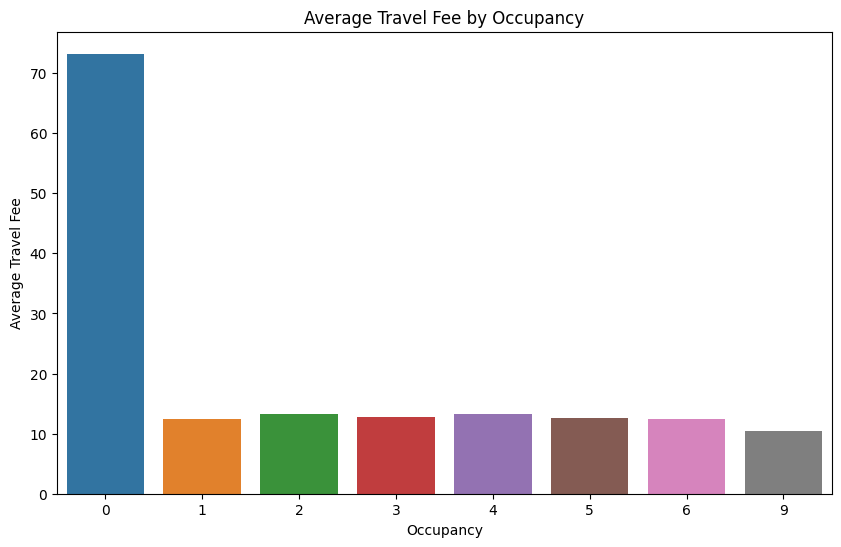

In [64]:
# Diagram 5 Average travel fee by occupancy
avg_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

### Correlation

In [65]:
corr_matrix = transport.corr(numeric_only=True)
corr_matrix

,travel_fee,departure_long,departure_lat,arrival_long,arrival_lat,occupancy
travel_fee,1.000000,0.017369,-0.014285,0.019246,-0.015714,0.010705
departure_long,0.017369,1.000000,-0.954586,0.961253,-0.929966,0.000210
departure_lat,-0.014285,-0.954586,1.000000,-0.925087,0.978716,-0.005372
arrival_long,0.019246,0.961253,-0.925087,1.000000,-0.954145,0.000265
arrival_lat,-0.015714,-0.929966,0.978716,-0.954145,1.000000,-0.005315
occupancy,0.010705,0.000210,-0.005372,0.000265,-0.005315,1.000000


### Query Date

In [66]:
# 1. Query to find the average travel fee:
average_travel_fee = transport['travel_fee'].mean()
print("Average Travel Fee:", average_travel_fee)

Average Travel Fee: 12.581386693862859


In [67]:
# 2. Query to find the most common departure hour:
transport['departure_hour'] = pd.to_datetime(transport['departure_time']).dt.hour
most_common_departure_hour = transport['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [68]:
# Query 3: Travel Fee Range
min_travel_fee = transport['travel_fee'].min()
max_travel_fee = transport['travel_fee'].max()
print("Travel Fee Range: {} - {}".format(min_travel_fee, max_travel_fee))

Travel Fee Range: -9.0 - 450.0


In [69]:
# Query 4: Average Travel Fee by Occupancy
average_fee_by_occupancy = transport.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
0    73.225000
1    12.408361
2    13.296604
3    12.799096
4    13.188708
5    12.675324
6    12.500066
9    10.500000
Name: travel_fee, dtype: float64


In [70]:
# Query 5: Average Travel Fee by Hour
transport['departure_time'] = pd.to_datetime(transport['departure_time'])
transport['hour'] = transport['departure_time'].dt.hour
average_fee_by_hour = transport.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     12.867651
1     12.552954
2     12.542678
3     12.929691
4     15.096145
5     17.364608
6     13.246422
7     12.233075
8     12.258894
9     12.152060
10    12.191150
11    12.321088
12    12.295155
13    12.998769
14    13.296920
15    13.460226
16    13.253390
17    12.922007
18    12.140718
19    11.633774
20    11.645497
21    12.226023
22    12.425779
23    12.839848
Name: travel_fee, dtype: float64


In [71]:
# Query 6: Busiest Departure Locations
most_common_departures = transport.groupby(['departure_lat', 'departure_long']).size().nlargest(5)
print("Busiest Departure Locations:")
print(most_common_departures)

Busiest Departure Locations:
departure_lat  departure_long
0.000000        0.000000         6639
40.765990      -74.023050          20
40.744844      -73.948726          15
40.744916      -73.949047          11
40.622553      -73.988070           7
dtype: int64


In [72]:
# Query 7: Popular Travel Routes
popular_routes = transport.groupby(['departure_lat', 'departure_long', 'arrival_lat', 'arrival_long']).size().nlargest(5)
print("Popular Travel Routes:")
print(popular_routes)

Popular Travel Routes:
departure_lat  departure_long  arrival_lat  arrival_long
0.000000        0.000000       0.000000      0.000000       6427
40.765990      -74.023050      40.765990    -74.023050        20
40.744844      -73.948726      40.744844    -73.948726        15
40.744916      -73.949047      40.744916    -73.949047        11
40.622553      -73.988070      40.622553    -73.988070         7
dtype: int64


### Data Preprocessing

In [73]:
sample_size = min(500000, len(transport))
transport = transport.sample(n=sample_size)


travelfee_train, travelfee_test = train_test_split(transport, test_size=0.2, random_state=42)

print("Length of travelfee_train:", len(travelfee_train))
print("Length of travelfee_test:", len(travelfee_test))

Length of travelfee_train: 333380
Length of travelfee_test: 83345


In [74]:
#check is there any data is null value
travelfee_train.isnull().sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      1
arrival_lat       1
occupancy         0
departure_hour    0
hour              0
dtype: int64

In [75]:
#handling missing value
travelfee_train["departure_long"].fillna(travelfee_train["departure_long"].mean(), inplace=True)
travelfee_train["departure_lat"].fillna(travelfee_train["departure_lat"].mean(), inplace=True)
travelfee_train["occupancy"].fillna(travelfee_train["occupancy"].mode()[0], inplace=True)
travelfee_train.drop(columns=['ID'], inplace=True)

# Drop rows with missing "departure_time","arrival_long" and "arrival_lat"
travelfee_train.dropna(subset=["departure_time", "arrival_long", "arrival_lat"],inplace = True)
travelfee_train.isnull().sum()

# Drop rows with a 0 value of occupancy
travelfee_train = travelfee_train.drop(travelfee_train[travelfee_train['occupancy'] <= 0].index)

# Handling Outliers
# Select columns for numeric attributes
num_attribs = ['departure_long', 'departure_lat', 'arrival_long', 'arrival_lat', 'occupancy', 'travel_fee']

# Remove outliers using Z-score method
z_scores = np.abs((travelfee_train[num_attribs] - travelfee_train[num_attribs].mean()) / travelfee_train[num_attribs].std())
travelfee_train = travelfee_train[(z_scores < 3).all(axis=1)]
travelfee_train.info()
travelfee_train

# Filter out rows with 0 values in departure_long, departure_lat, arrival_long, and arrival_lat
travelfee_train = travelfee_train[
    (travelfee_train["departure_long"] != 0) &
    (travelfee_train["departure_lat"] != 0) &
    (travelfee_train["arrival_long"] != 0) &
    (travelfee_train["arrival_lat"] != 0)
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305449 entries, 85853 to 134642
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      305449 non-null  float64            
 1   departure_time  305449 non-null  datetime64[ns, UTC]
 2   departure_long  305449 non-null  float64            
 3   departure_lat   305449 non-null  float64            
 4   arrival_long    305449 non-null  float64            
 5   arrival_lat     305449 non-null  float64            
 6   occupancy       305449 non-null  int64              
 7   departure_hour  305449 non-null  int64              
 8   hour            305449 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(3)
memory usage: 23.3 MB


In [76]:
# Convert departure_time to datetime
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])

# Extract features from departure_time
travelfee_train['hour_of_day'] = travelfee_train['departure_time'].dt.hour
travelfee_train['day_of_week'] = travelfee_train['departure_time'].dt.dayofweek

# Calculate Euclidean distance between departure and arrival locations
travelfee_train['distance'] = travelfee_train.apply(lambda row: euclidean((row['departure_lat'], row['departure_long']),
                                                             (row['arrival_lat'], row['arrival_long'])), axis=1)


In [77]:
travelfee_train.info()
travelfee_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305449 entries, 85853 to 134642
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   travel_fee      305449 non-null  float64            
 1   departure_time  305449 non-null  datetime64[ns, UTC]
 2   departure_long  305449 non-null  float64            
 3   departure_lat   305449 non-null  float64            
 4   arrival_long    305449 non-null  float64            
 5   arrival_lat     305449 non-null  float64            
 6   occupancy       305449 non-null  int64              
 7   departure_hour  305449 non-null  int64              
 8   hour            305449 non-null  int64              
 9   hour_of_day     305449 non-null  int64              
 10  day_of_week     305449 non-null  int64              
 11  distance        305449 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(5)
memory usage: 30.3 M

,travel_fee,departure_time,departure_long,departure_lat,arrival_long,arrival_lat,occupancy,departure_hour,hour,hour_of_day,day_of_week,distance
85853,6.0,2013-09-02 15:03:13+00:00,-73.996955,40.725403,-74.003997,40.716007,2,15,15,15,0,0.011742
8691,6.0,2013-05-26 21:19:00+00:00,-73.952647,40.776672,-73.958775,40.763167,1,21,21,21,6,0.014830
399371,11.5,2013-09-01 19:44:11+00:00,-73.989961,40.735375,-74.002722,40.756022,2,19,19,19,6,0.024272
255207,8.5,2013-10-06 12:49:00+00:00,-73.988705,40.737132,-74.001602,40.755712,1,12,12,12,6,0.022617
195213,9.5,2013-01-18 22:12:00+00:00,-74.000797,40.736152,-73.991870,40.764675,1,22,22,22,4,0.029887


In [78]:
travelfee = travelfee_train[['hour_of_day', 'day_of_week','occupancy','distance']]
travelfee_labels = travelfee_train["travel_fee"].copy()
x1_train, x1_test, y1_train, y1_test = train_test_split(travelfee, travelfee_labels, test_size=0.2, random_state=42)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = [ 'hour_of_day', 'day_of_week','occupancy','distance' ]

num_pipeline = make_pipeline(
    StandardScaler()  # Scale features
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    # Apply numeric pipeline to numeric attributes
])

In [80]:
transport_prepared = preprocessing.fit_transform(travelfee)
transport_prepared

array([[ 0.22670799, -1.55433171,  0.43004789, -0.26038168],
       [ 1.13983476,  1.51215009, -0.48869161, -0.21831113],
       [ 0.83545917,  1.51215009,  0.43004789, -0.08968697],
       ...,
       [ 0.98764697, -1.04325141,  3.1862664 , -0.12882273],
       [ 0.0745202 ,  1.51215009, -0.48869161, -0.33154061],
       [ 0.22670799,  1.00106979, -0.48869161, -0.1000959 ]])

In [81]:
preprocessing.get_feature_names_out()

array(['num__hour_of_day', 'num__day_of_week', 'num__occupancy',
       'num__distance'], dtype=object)

Visualisation and Query after Data Preprocessing

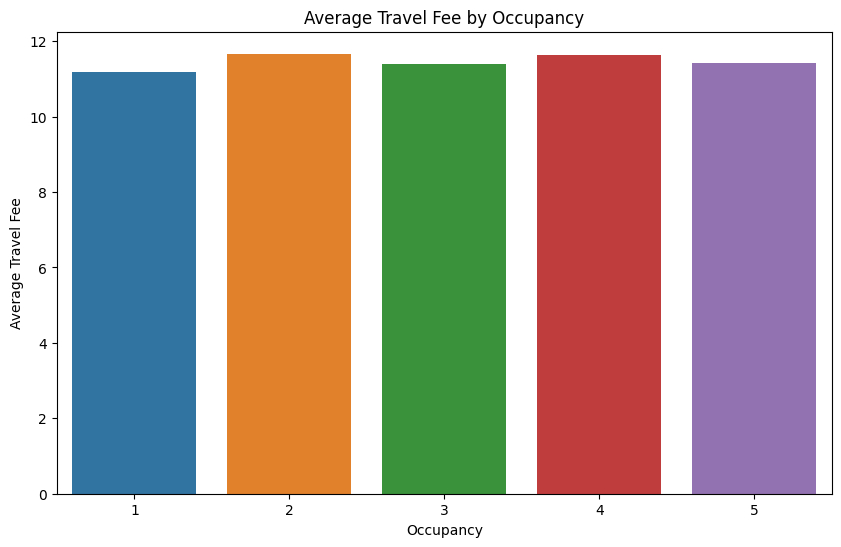

In [82]:
# Diagram 1 Average travel fee by occupancy
avg_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fee_by_occupancy.index, y=avg_fee_by_occupancy.values)
plt.title('Average Travel Fee by Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Average Travel Fee')
plt.show()

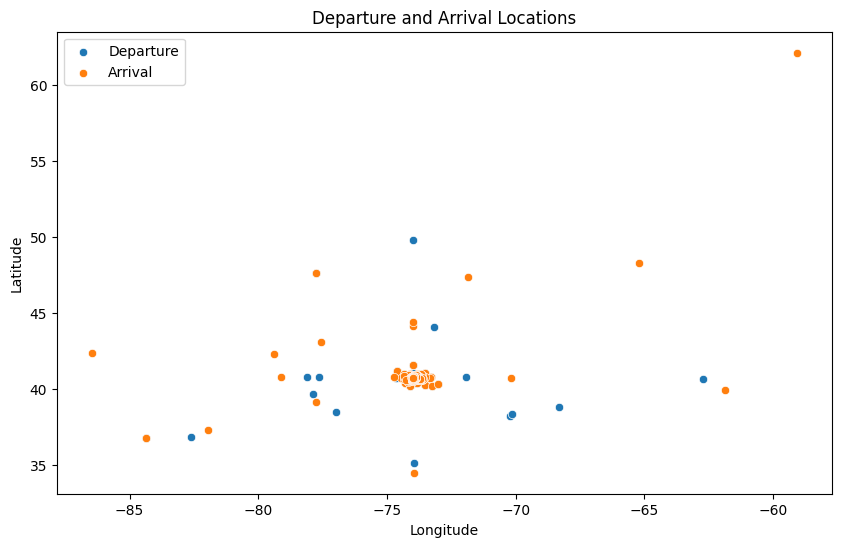

In [83]:
#Diagram 2 Departure and Arrival Locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=travelfee_train, x='departure_long', y='departure_lat', label='Departure')
sns.scatterplot(data=travelfee_train, x='arrival_long', y='arrival_lat', label='Arrival')
plt.title('Departure and Arrival Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [84]:
# Query 1. Query to find the most common departure hour:
travelfee_train['departure_hour'] = pd.to_datetime(travelfee_train['departure_time']).dt.hour
most_common_departure_hour = travelfee_train['departure_hour'].mode()[0]
print("Most Common Departure Hour:", most_common_departure_hour)

Most Common Departure Hour: 19


In [85]:
# Query 2: Average Travel Fee by Occupancy
average_fee_by_occupancy = travelfee_train.groupby('occupancy')['travel_fee'].mean()
print("Average Travel Fee by Occupancy:")
print(average_fee_by_occupancy)

Average Travel Fee by Occupancy:
occupancy
1    11.190992
2    11.669258
3    11.403399
4    11.641747
5    11.415992
Name: travel_fee, dtype: float64


In [86]:
# Query 3: Average Travel Fee by Hour
travelfee_train['departure_time'] = pd.to_datetime(travelfee_train['departure_time'])
travelfee_train['hour'] = travelfee_train['departure_time'].dt.hour
average_fee_by_hour = travelfee_train.groupby('hour')['travel_fee'].mean()
print("Average Travel Fee by Hour:")
print(average_fee_by_hour)

Average Travel Fee by Hour:
hour
0     11.883197
1     11.778850
2     11.852312
3     12.154446
4     13.380540
5     13.134412
6     10.635247
7     10.594943
8     11.035440
9     11.245572
10    11.189449
11    11.217561
12    11.198528
13    11.302255
14    11.408791
15    11.482795
16    11.173563
17    11.297844
18    11.007314
19    10.732701
20    10.708451
21    11.169174
22    11.419102
23    11.902325
Name: travel_fee, dtype: float64


### Modelling

### Model 1: Random Forest Regressor

In [87]:
#Predict fair price
#Model 1: Random Reofest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

forest_rmses = -cross_val_score(forest_reg, x1_train, y1_train,
                                scoring="neg_root_mean_squared_error",
                                cv=3)
forest_rmses

array([3.13447147, 3.12394438, 3.128888  ])

In [88]:
pd.Series(forest_rmses).describe()

count    3.000000
mean     3.129101
std      0.005267
min      3.123944
25%      3.126416
50%      3.128888
75%      3.131680
max      3.134471
dtype: float64

In [89]:
from sklearn.model_selection import cross_validate
forest_rmses = cross_validate(forest_reg,
                              x1_train, y1_train,
                              scoring="neg_root_mean_squared_error",
                              cv=2,
                              return_train_score=True)

forest_rmses

{'fit_time': array([39.93323588, 40.91538811]),
 'score_time': array([5.67786312, 5.69969797]),
 'test_score': array([-3.13925538, -3.12593024]),
 'train_score': array([-1.22384823, -1.22627795])}

In [90]:
forest_reg.fit(x1_train, y1_train)
travelfee_predictions = forest_reg.predict(x1_train)
forest_rmse = mean_squared_error(y1_train,
                                 travelfee_predictions,
                                 squared=False)
forest_rmse

1.2389713444881205

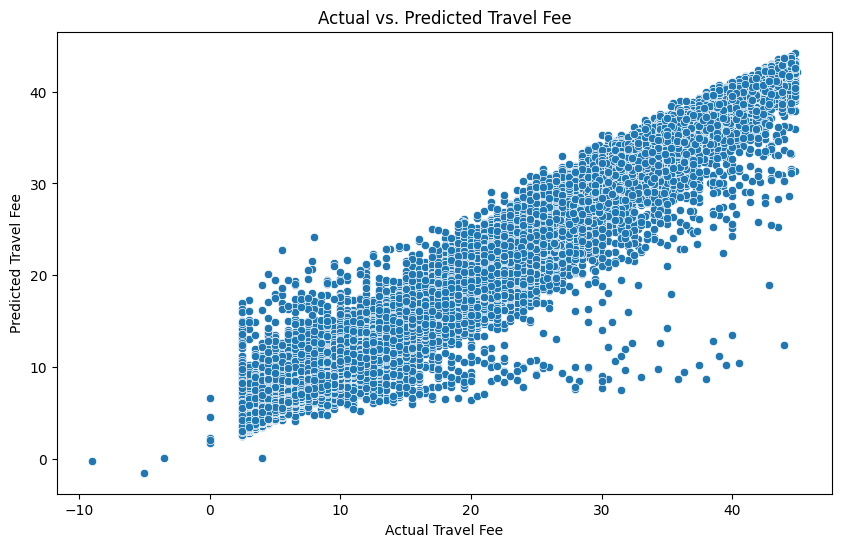

In [91]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_train, y=travelfee_predictions)
plt.xlabel('Actual Travel Fee')
plt.ylabel('Predicted Travel Fee')
plt.title('Actual vs. Predicted Travel Fee')
plt.show()

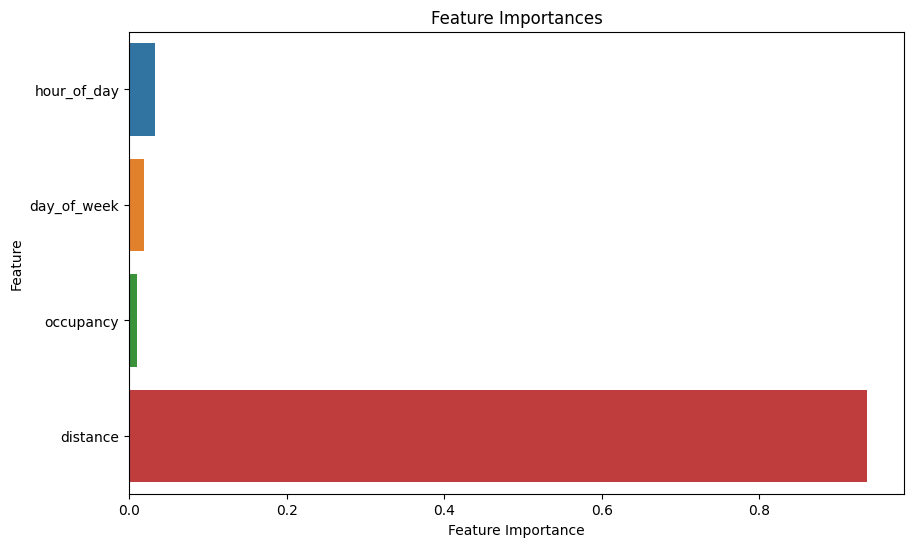

In [92]:
# Feature Importance Bar Plot:
# Get feature importances from the trained Random Forest model
feature_importances = forest_reg.named_steps['randomforestregressor'].feature_importances_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=num_attribs)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

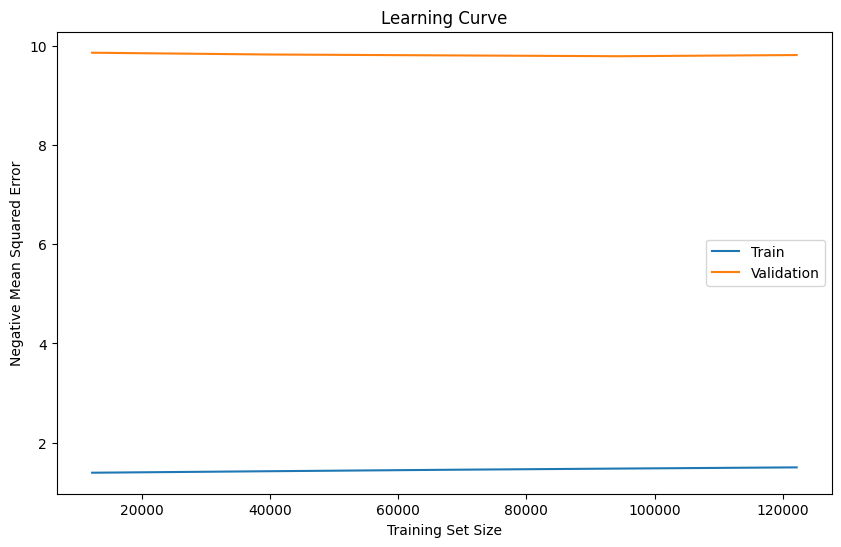

In [93]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    forest_reg, x1_train, y1_train, cv=2, scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation of scores
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Create learning curve plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train')
plt.plot(train_sizes, test_scores_mean, label='Validation')
plt.xlabel('Training Set Size')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [94]:
# Create a DataFrame to display actual and predicted prices
result_df = pd.DataFrame({
    'Actual Price': y1_train,
    'Predicted Price': travelfee_predictions
})

# Display the first few rows of the DataFrame
print(result_df.head())

        Actual Price  Predicted Price
192431         22.50          26.0272
11850           7.00           7.7450
156438         43.33          40.6164
282112          6.00           6.4900
370727         12.00          10.9150


### Fine Tuning

In [95]:
### Model 1: Random Forest Regressor

In [96]:
rf_regressor = RandomForestRegressor(random_state=42)
# Create a pipeline with preprocessing and random forest regressor
rf_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rf_reg", rf_regressor),
])

# Define the parameter grid for hyperparameter tuning
param_distributions = [
    {'rf_reg__n_estimators': [100, 200, 300],
     'rf_reg__max_depth': [None, 10, 20],
     'rf_reg__min_samples_split': [2, 5, 10]}
]

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_full_pipeline, param_distributions, cv=2, scoring='neg_mean_squared_error')

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
grid_search_rf.fit(x1_train, y1_train)


# Perform randomized search with cross-validation
random_search_rf = RandomizedSearchCV(rf_full_pipeline, param_distributions,
                                      n_iter=10, cv=2, scoring='neg_mean_squared_error',
                                      random_state=42)

# Assuming 'travelfee' is your feature data and 'travelfee_labels' are the target labels
random_search_rf.fit(x1_train, y1_train)

# Calculate RMSE and standard deviation of RMSE for grid search
grid_rmse_scores = np.sqrt(-grid_search_rf.cv_results_['mean_test_score'])
grid_rmse_mean = np.mean(grid_rmse_scores)
grid_rmse_std = np.std(grid_rmse_scores)

# Calculate RMSE and standard deviation of RMSE for randomized search
randomized_rmse_scores = np.sqrt(-random_search_rf.cv_results_['mean_test_score'])
randomized_rmse_mean = np.mean(randomized_rmse_scores)
randomized_rmse_std = np.std(randomized_rmse_scores)

# Print the results
print("Grid Search RMSE - Mean:", grid_rmse_mean)
print("Grid Search RMSE - Standard Deviation:", grid_rmse_std)
print("Randomized Search RMSE - Mean:", randomized_rmse_mean)
print("Randomized Search RMSE - Standard Deviation:", randomized_rmse_std)

# Print best parameters
print("Tuned hyperparameters (best parameters):", random_search_rf.best_params_)


Grid Search RMSE - Mean: 2.9956003619284854
Grid Search RMSE - Standard Deviation: 0.07955485598674222
Randomized Search RMSE - Mean: 2.9533389572452435
Randomized Search RMSE - Standard Deviation: 0.07759739269414262
Tuned hyperparameters (best parameters): {'rf_reg__n_estimators': 300, 'rf_reg__min_samples_split': 10, 'rf_reg__max_depth': 10}


### Model 2: Ridge Refression

In [111]:
#Predict fair price
#Model 2: Ridge Regression

In [102]:
from sklearn.linear_model import Ridge
# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x1_train, y1_train)

Ridge()

In [104]:
ridge_score = cross_val_score(ridge_model, x1_train, y1_train, cv=5,verbose=2)
print("Ridge Score: ", ridge_score)
print(ridge_score.mean(),ridge_score.std())

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Ridge Score:  [ 0.12067867  0.1334855   0.13132913  0.12937063 -0.54631195]
-0.0062896031991552135 0.2700462080135129


### Fine Tuning

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

In [106]:
# Define the hyperparameters grid
parameters = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}


In [107]:
# Create Ridge regression model
ridge_cv = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=10)
ridge_cv.fit(x1_train, y1_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                   0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [108]:
# Get the best Ridge model
best_ridge = ridge_cv.best_estimator_

In [109]:
# Calculate RMSE for each fold and mean RMSE
mse_scores = -ridge_cv.cv_results_['mean_test_score']
rmse_scores = np.sqrt(mse_scores)

In [110]:
# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", ridge_cv.best_params_)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

Best Hyperparameters: {'alpha': 100}
Mean RMSE: 7.100296084665038
Standard Deviation of RMSE: 0.013481104900050883
